In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')

In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df.shape

(24783, 7)

In [8]:
df.columns

# we need only class and tweet columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [11]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

## Data Cleaning

In [ ]:
# deleting unwanted columns

df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace=True)

In [15]:
df.sample(5)

,class,tweet
16109,1,RT @LILBTHEBASEDGOD: I only eat gluton free pu...
18998,1,"RT @femaIestweets: ""nah go talk to ur bitch si..."
10214,1,I don't have another face other than my bitch ...
1548,1,&#8220;@TedOfficialPage: Fucked your bitch and...
6146,1,@iank12 bitch


In [17]:
# Checking for null values

df.isna().sum()

class    0
tweet    0
dtype: int64

In [20]:
df.tweet.sample(10)

# the tweets contains many symbols

22848    Why are people saying don't let guys treat you...
884      #porn,#android,#iphone,#ipad,#sex,#xxx, | #Han...
23178                           Yo bitch choosin just letr
19830    RT @peeabut: Dear god, make me a bird so I can...
6730     @mrfoolycooly i dont think he did the celestia...
7175     @thrillllllllll oh yea I forgot u decided to h...
13185    Nah fuck Bungie they ain't givng me nNO drops....
14424    RT @BleacherReport: VIDEO: Derek Jeter hits a ...
7953     Basically, so...just do you. *shrugs* RT @Cruz...
22772          Where is @StephyRae7 ... I miss that bitch.
Name: tweet, dtype: object

In [25]:
# keeping only alphabets and deleting unwanted symbols and numeric data

df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex=True)

In [26]:
df.processed_tweet.sample(10)

22031    This faggot in a truck was tailgating me  so I...
4031                  MaricelaBela stop being bitchy bitch
74         BVSEDCHINK  Yo fuck skateboarding  all y all...
13973    RIGHT   Sotyannaxo  The same bitches saying  p...
12015    Its too early for all this bullshit  fuck all ...
5954      fabbymichelle your one of my bitches you make...
21120                       Spark these bitches interests 
1509             Sair      you lucky ashit if you got t...
16074    RT  KrisDaRebel          Aye Benny  Searching ...
9327     Fucking faggots  DMVFollowers aren t from or l...
Name: processed_tweet, dtype: object

In [27]:
df.head()

,class,tweet,processed,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you...


In [28]:
# handle the long spaces between the words which are unwanted

df['processed_tweet2'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex=True)

In [30]:
df.processed_tweet2.sample(10)

# now it is working correctly

363       maybe Now u got what u want bitch Enjoy it ht...
9554                                         Gotchya bitch
8056     Bitch you may have a million dollar body but y...
5481      alammus small man syndrome usually deep down ...
20210    RT toodope bro If a nigga can tell hoes he s t...
7641     All these hoes say that wanna be cuffed bitch ...
13739    Outside my click it ain t another nicca fucc n...
3508      InTheOvenJews SlaveCatcher marylene we should...
23830    french montana gotta give that kardashian bitc...
10671    I like it Folks act like the word negro is the...
Name: processed_tweet2, dtype: object

In [ ]:
# Deleting unwanted columns
df.drop(columns = ['tweet', 'processed_tweet', 'processed'], inplace=True)

In [36]:
df.head()

,class,processed_tweet2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


## Natural language Processing

In [37]:
# Natural Language PRocessing
import spacy

nlp = spacy.load('en_core_web_sm')

In [38]:
# Lemmatization - which converts the words to their base word

def lemma(text):
    doc = nlp(text)
    lemmalist = [word.lemma_ for word in doc]
    return ' '.join(lemmalist)

In [39]:
# Creating a column to store lemmatized text and applying the function on this column

df['lemma_tweet'] = df['processed_tweet2'].apply(lemma)

In [40]:
df.lemma_tweet.sample(10)

19974    RT saucygyro WhitePonyJr ugly bitch have blood...
12631    lolololol not to be a hoe but that be a nyyce one
1812          kaitlinfryer big oleeeee middle finger bitch
19459    RT kooleyCobain you can t find what you lookin...
18082    RT Women Fit Use what talent you possess the w...
12723    man I think that heifer be yo old bitch when y...
16016    RT KillAllSimps I remember I be have phone sex...
14618    RT causewereguy kiss a girl you you actually r...
285        YoungRicooo Happy birthday bitch nigga Wexic...
21551    the fact that the Bruins draft a Yankees fan j...
Name: lemma_tweet, dtype: object

In [41]:
# Removing the stop words

def remove_sw(text):
    doc = nlp(text)
    no_stopwords = [word.text for word in doc if not word.is_stop]
    return ' '.join(no_stopwords)

In [42]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_sw)

In [43]:
df.head()

,class,processed_tweet2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [44]:
# removing unwanted columns for processing

df.drop(columns = ['lemma_tweet', 'processed_tweet2'], inplace=True)

# Preprocessing

In [45]:
# One hot encoding
from tensorflow.keras.preprocessing.text import one_hot

vocab_size = 10000
one_hot = [one_hot(words, vocab_size) for words in df['final_tweet']] 

In [53]:
for i in range(0, 4):
    print(df['final_tweet'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny


In [55]:
for i in range(0, 4):
    print(one_hot[i])

# This is the one-hot representation for the above sentence

[5540, 5728, 6340, 9340, 9716, 1151, 1856, 7930, 6805, 4968, 1937]
[5540, 1854, 5570, 7601, 4445, 7230, 7715, 5136, 4395, 7601, 2936, 1505, 8448]
[5540, 7942, 3274, 5540, 3476, 233, 40, 3194, 4067, 8274, 6195, 1210]
[5540, 1705, 4786, 2198, 4109, 1337, 8745, 2962, 7963]


In [57]:
# Padding - as you can see in the above examples all the vector representation is in different size, to make them to be of same size, we do padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentence_length = 20 # lets make the default size as 20 
embedded_tweet = pad_sequences(one_hot, padding = 'pre', maxlen= sentence_length)

for i in range(0, 4):
    print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0 5540 5728 6340 9340 9716
 1151 1856 7930 6805 4968 1937]
[   0    0    0    0    0    0    0 5540 1854 5570 7601 4445 7230 7715
 5136 4395 7601 2936 1505 8448]
[   0    0    0    0    0    0    0    0 5540 7942 3274 5540 3476  233
   40 3194 4067 8274 6195 1210]
[   0    0    0    0    0    0    0    0    0    0    0 5540 1705 4786
 2198 4109 1337 8745 2962 7963]


In [59]:
# Devide the data into X and y

X = np.array(embedded_tweet)
y = np.array(df['class'])

In [62]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [ ]:
# lets balance the dataset
from imblearn.oversampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [64]:
#splitting the data for training and testing\

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19826, 20), (4957, 20), (19826,), (4957,))

## Build the Stack LSTM model

In [73]:
dimension = 50

model = keras.Sequential([
    # Embedding layers
    keras.layers.Embedding(vocab_size, dimension, input_length = sentence_length),

    # Stacked LSTM Layers
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),

    # Output layer
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_split = 0.2,
    batch_size = 32
)

Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8104 - loss: 0.5635 - val_accuracy: 0.9014 - val_loss: 0.2973
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9147 - loss: 0.2750 - val_accuracy: 0.9017 - val_loss: 0.2826
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9277 - loss: 0.2235 - val_accuracy: 0.8782 - val_loss: 0.3390
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9379 - loss: 0.1881 - val_accuracy: 0.8886 - val_loss: 0.3618
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9573 - loss: 0.1354 - val_accuracy: 0.8949 - val_loss: 0.3677
Epoch 6/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9732 - loss: 0.0917 - val_accuracy: 0.8833 - val_loss: 0.4355
Epoch 7/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9805 - loss: 0.0618 - val_accuracy: 0.8812 - val_loss: 0.4566
Epoch 8/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9872 - loss: 0.0467 - 

In [76]:
loss, acc = model.evaluate(X_test, y_test)
print(f"{acc*100:.2f}")

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8514 - loss: 0.6869
84.63


In [80]:
model.predict(X_test)

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


array([[3.1610223e-04, 9.9932832e-01, 3.5555058e-04],
       [1.4259225e-04, 5.4204772e-04, 9.9931532e-01],
       [2.0583953e-04, 9.9958533e-01, 2.0886520e-04],
       ...,
       [4.0164366e-04, 9.9912828e-01, 4.7006004e-04],
       [2.8020097e-04, 9.9853873e-01, 1.1810724e-03],
       [2.6498520e-04, 9.9908817e-01, 6.4681878e-04]], dtype=float32)

In [82]:
y_pred = np.argmax(model.predict(X_test), axis = -1)

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [83]:
y_test[:5]

array([1, 2, 1, 1, 1])

In [84]:
y_pred[:5]

array([1, 2, 1, 1, 1])

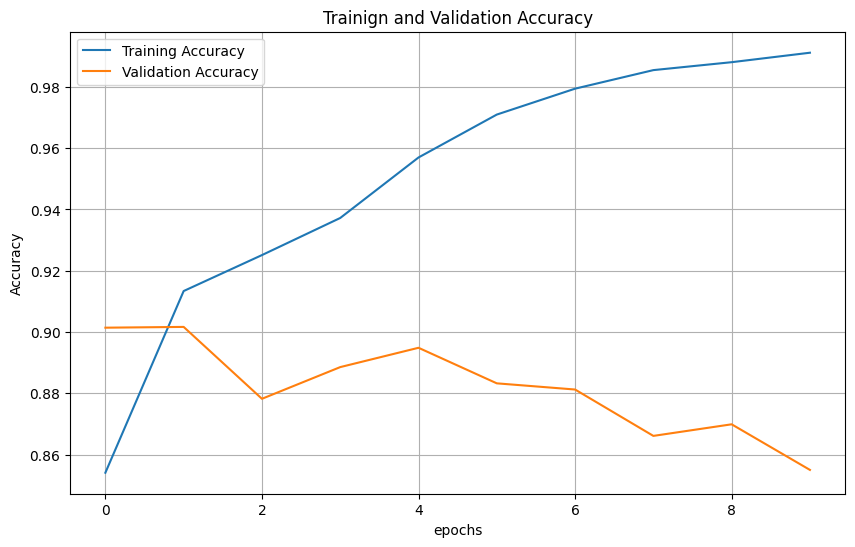

In [92]:
plt.figure(figsize = (10, 6))

plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")

plt.title('Trainign and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.grid()
plt.show()

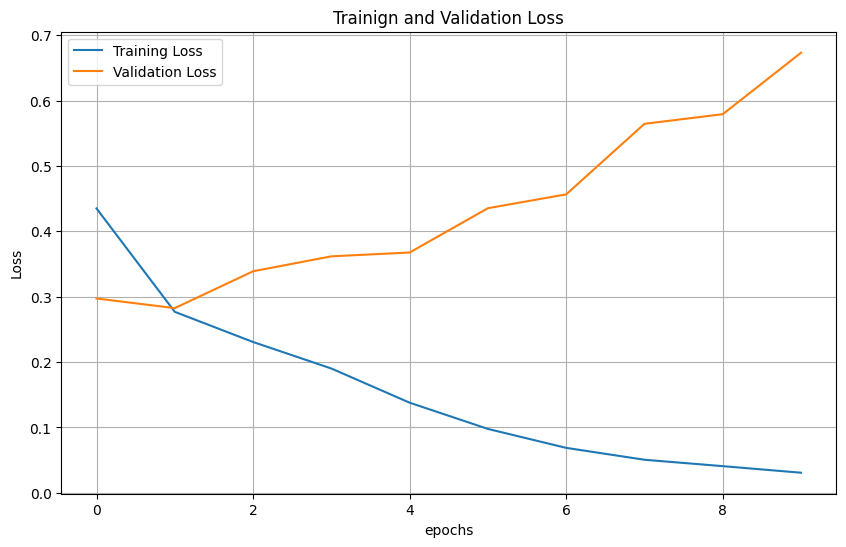

In [93]:
plt.figure(figsize = (10, 6))

plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")

plt.title('Trainign and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("Loss")

plt.legend()
plt.grid()
plt.show()

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.23      0.23      0.23       286
           1       0.90      0.92      0.91      3838
           2       0.79      0.72      0.75       833

    accuracy                           0.85      4957
   macro avg       0.64      0.62      0.63      4957
weighted avg       0.84      0.85      0.84      4957



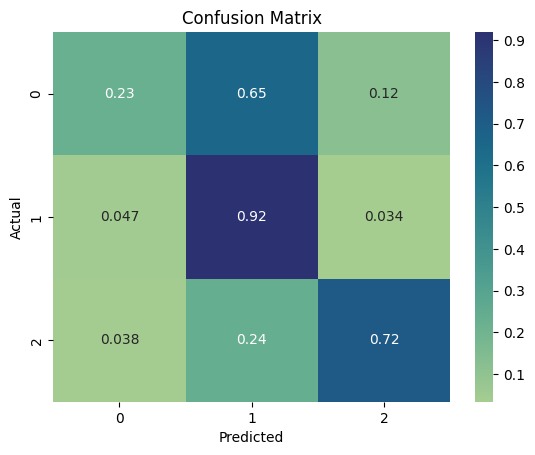

In [90]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, normalize = "true")
sns.heatmap(cm, cmap='crest', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

IF the f1-score improves then the performance of the model also increases